## Import Modules and Clean Data

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
np.random.seed(42)

In [3]:
train = ('../data/train_cleaned.csv')
test = ('../data/test_cleaned.csv')
train_df = pd.read_csv(train, index_col='Id')
test_df = pd.read_csv(test, index_col='Id')

##  Correlation

Below is a heatmap showing the correlation between the numeric features and SalePrice.

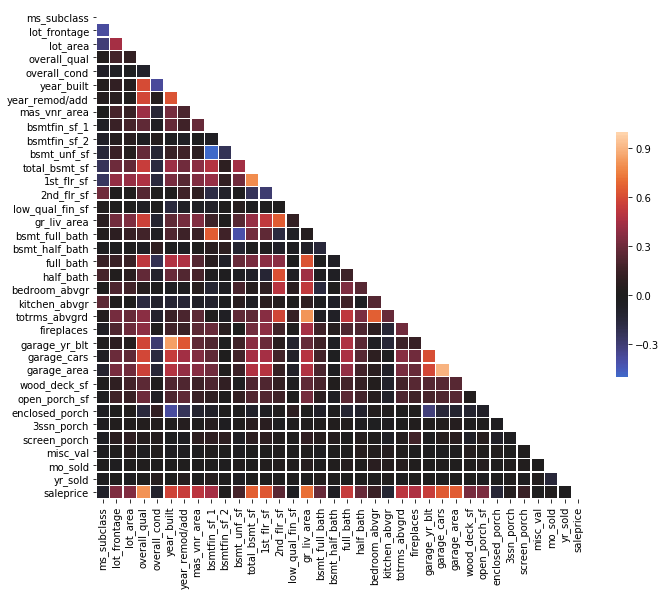

In [4]:
numeric_columns = train_df[train_df.select_dtypes(exclude = object).columns]
corr = numeric_columns.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

While this heatmap is a helpful visual I would like to find the exact correlation between each of the variables.  I will create a matrix showing the correlation between each pair of numeric features and which highlights each cell which has a correlation large than 0.5.

In [5]:
c = train_df.corr().abs().unstack().sort_values(ascending=False)
c[(c >= 0.5) & (c < 1)]

garage_cars     garage_area       0.896401
garage_area     garage_cars       0.896401
year_built      garage_yr_blt     0.846149
garage_yr_blt   year_built        0.846149
totrms_abvgrd   gr_liv_area       0.812397
gr_liv_area     totrms_abvgrd     0.812397
overall_qual    saleprice         0.803031
saleprice       overall_qual      0.803031
total_bsmt_sf   1st_flr_sf        0.792965
1st_flr_sf      total_bsmt_sf     0.792965
saleprice       gr_liv_area       0.718434
gr_liv_area     saleprice         0.718434
bedroom_abvgr   totrms_abvgrd     0.664206
totrms_abvgrd   bedroom_abvgr     0.664206
saleprice       total_bsmt_sf     0.663925
total_bsmt_sf   saleprice         0.663925
garage_area     saleprice         0.659024
saleprice       garage_area       0.659024
bsmt_full_bath  bsmtfin_sf_1      0.657202
bsmtfin_sf_1    bsmt_full_bath    0.657202
2nd_flr_sf      gr_liv_area       0.656673
gr_liv_area     2nd_flr_sf        0.656673
saleprice       garage_cars       0.650534
garage_cars

**Garage Cars**

I can see that Garage Cars and Garage Area have a very high correlation.  This makes sense since you would expect that a garage would have the requisite amount of room for the cars in it.  I will drop Garage Cars from the dataframe.   

In [6]:
train_df.drop(['garage_cars'], axis=1, inplace=True)

In [7]:
test_df.drop(['garage_cars'], axis=1, inplace=True)

**Total SF**

I am going to add the square footage (SF) columns to get the total area variable.  This will combine all SF columns into one and hopefully reduce multicollinearity.

In [8]:
train_df['total_area'] = (train_df['total_bsmt_sf'] + train_df['1st_flr_sf'] + train_df['2nd_flr_sf'] + 
                       train_df['low_qual_fin_sf'] + train_df['wood_deck_sf'] + train_df['open_porch_sf'])

In [9]:
test_df['total_area'] = (test_df['total_bsmt_sf'] + test_df['1st_flr_sf'] + test_df['2nd_flr_sf'] + 
                       test_df['low_qual_fin_sf'] + test_df['wood_deck_sf'] + test_df['open_porch_sf'])

Now I can drop the individual elements from the Total Area.  

In [10]:
train_df.drop(['total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf',
                       'low_qual_fin_sf', 'wood_deck_sf', 'open_porch_sf'], 
                           axis=1, inplace=True)

In [11]:
test_df.drop(['total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf',
                       'low_qual_fin_sf', 'wood_deck_sf', 'open_porch_sf'], 
                           axis=1, inplace=True)

**Total Bath**

Now I will go through the same process with the columns in the dataframe relating to bathrooms

In [12]:
train_df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,heating,heating_qc,central_air,electrical,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_area,garage_qual,garage_cond,paved_drive,enclosed_porch,3ssn_porch,screen_porch,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_area
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,60,RL,68.0,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,GasA,Ex,Y,SBrkr,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,None,Attchd,1976.0,RFn,475.0,TA,TA,Y,0,0,0,None,None,0,3,2010,WD,130500,2248.0
544,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,GasA,Ex,Y,SBrkr,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,559.0,TA,TA,Y,0,0,0,None,None,0,4,2009,WD,220000,3109.0
153,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,GasA,TA,Y,SBrkr,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,None,Detchd,1953.0,Unf,246.0,TA,TA,Y,0,0,0,None,None,0,1,2010,WD,109000,2166.0
318,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,GasA,Gd,Y,SBrkr,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,None,BuiltIn,2007.0,Fin,400.0,TA,TA,Y,0,0,0,None,None,0,4,2010,WD,174000,1928.0
255,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,GasA,TA,Y,SBrkr,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,None,Detchd,1957.0,Unf,484.0,TA,TA,N,0,0,0,None,None,0,3,2010,WD,138500,2180.0


In [13]:
train_df['total_bath'] = (train_df['bsmt_full_bath'] + train_df['full_bath'] + 
                          0.5 * train_df['bsmt_half_bath'] + 0.5 * train_df['half_bath'])

In [14]:
test_df['total_bath'] = (test_df['bsmt_full_bath'] + test_df['full_bath'] + 
                          0.5 * test_df['bsmt_half_bath'] + 0.5 * test_df['half_bath'])

In [15]:
train_df.drop(['bsmt_full_bath','full_bath','bsmt_half_bath','half_bath'], axis=1, inplace=True)

In [16]:
test_df.drop(['bsmt_full_bath','full_bath','bsmt_half_bath','half_bath'], axis=1, inplace=True)

In [17]:
train_df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,heating,heating_qc,central_air,electrical,gr_liv_area,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_area,garage_qual,garage_cond,paved_drive,enclosed_porch,3ssn_porch,screen_porch,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_area,total_bath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,60,RL,68.0,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,GasA,Ex,Y,SBrkr,1479,3,1,Gd,6,Typ,0,None,Attchd,1976.0,RFn,475.0,TA,TA,Y,0,0,0,None,None,0,3,2010,WD,130500,2248.0,2.5
544,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,GasA,Ex,Y,SBrkr,2122,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,559.0,TA,TA,Y,0,0,0,None,None,0,4,2009,WD,220000,3109.0,3.5
153,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,GasA,TA,Y,SBrkr,1057,3,1,Gd,5,Typ,0,None,Detchd,1953.0,Unf,246.0,TA,TA,Y,0,0,0,None,None,0,1,2010,WD,109000,2166.0,2.0
318,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,GasA,Gd,Y,SBrkr,1444,3,1,TA,7,Typ,0,None,BuiltIn,2007.0,Fin,400.0,TA,TA,Y,0,0,0,None,None,0,4,2010,WD,174000,1928.0,2.5
255,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,GasA,TA,Y,SBrkr,1445,3,1,TA,6,Typ,0,None,Detchd,1957.0,Unf,484.0,TA,TA,N,0,0,0,None,None,0,3,2010,WD,138500,2180.0,2.0


**Fireplaces**

In [18]:
train_df['fireplaces'].value_counts(normalize=True)

0    0.488748
1    0.438356
2    0.069961
3    0.002446
4    0.000489
Name: fireplaces, dtype: float64

Approximately 91% of the properties have 0 or 1 fireplaces.  So I will  assign a 1 to properties with a fireplace and a 0 to those without.  

In [19]:
train_df.loc[train_df['fireplaces'] >= 1, 'fireplaces'] = 1

In [20]:
train_df.loc[train_df['fireplaces'] == 0, 'fireplaces'] = 0

In [21]:
test_df.loc[test_df['fireplaces'] >= 1, 'fireplaces'] = 1

In [22]:
test_df.loc[test_df['fireplaces'] == 0, 'fireplaces'] = 0

In [23]:
train_df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,heating,heating_qc,central_air,electrical,gr_liv_area,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_area,garage_qual,garage_cond,paved_drive,enclosed_porch,3ssn_porch,screen_porch,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_area,total_bath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,60,RL,68.0,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,GasA,Ex,Y,SBrkr,1479,3,1,Gd,6,Typ,0,None,Attchd,1976.0,RFn,475.0,TA,TA,Y,0,0,0,None,None,0,3,2010,WD,130500,2248.0,2.5
544,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,GasA,Ex,Y,SBrkr,2122,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,559.0,TA,TA,Y,0,0,0,None,None,0,4,2009,WD,220000,3109.0,3.5
153,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,GasA,TA,Y,SBrkr,1057,3,1,Gd,5,Typ,0,None,Detchd,1953.0,Unf,246.0,TA,TA,Y,0,0,0,None,None,0,1,2010,WD,109000,2166.0,2.0
318,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,GasA,Gd,Y,SBrkr,1444,3,1,TA,7,Typ,0,None,BuiltIn,2007.0,Fin,400.0,TA,TA,Y,0,0,0,None,None,0,4,2010,WD,174000,1928.0,2.5
255,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,GasA,TA,Y,SBrkr,1445,3,1,TA,6,Typ,0,None,Detchd,1957.0,Unf,484.0,TA,TA,N,0,0,0,None,None,0,3,2010,WD,138500,2180.0,2.0


## Create Dummies

I am going to create dummies for all of the categorical columns in my dataframe.

In [24]:
train_df = pd.get_dummies(train_df)

In [25]:
test_df = pd.get_dummies(test_df)

In [26]:
train_df.shape, test_df.shape

((2044, 287), (879, 272))

There is a difference of 15 columns between the train and test dataframes.  I will have to address this before modeling.

In [27]:
list(set(train_df.columns).difference(test_df.columns))

['electrical_Mix',
 'neighborhood_Landmrk',
 'exterior_1st_CBlock',
 'condition_2_RRAn',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'garage_qual_Ex',
 'neighborhood_GrnHill',
 'roof_matl_Membran',
 'ms_zoning_A (agr)',
 'functional_Sev',
 'utilities_NoSeWa',
 'condition_2_RRAe',
 'bsmt_cond_Po',
 'functional_Sal',
 'heating_Wall',
 'exterior_2nd_Stone',
 'heating_OthW',
 'condition_2_RRNn',
 'condition_2_Artery',
 'saleprice',
 'heating_qc_Po',
 'bsmt_cond_Ex',
 'misc_feature_TenC']

**Add Columns to Test Data and Weight as 0**

In [28]:
test_df['electrical_Mix'] = 0
test_df['neighborhood_Landmrk'] = 0
test_df['ms_zoning_A (agr)'] = 0
test_df['misc_feature_TenC'] = 0
test_df['heating_OthW'] = 0
test_df['bsmt_cond_Po'] = 0
test_df['exterior_1st_Stone'] = 0
test_df['utilities_NoSeWa'] = 0
test_df['functional_Sev'] = 0
test_df['functional_Sal'] = 0
test_df['heating_qc_Po'] = 0
test_df['exterior_1st_CBlock'] = 0
test_df['garage_qual_Ex'] = 0
test_df['heating_Wall'] = 0
test_df['condition_2_Artery'] = 0
test_df['exterior_2nd_Stone'] = 0
test_df['exterior_1st_ImStucc'] = 0
test_df['roof_matl_Membran'] = 0
test_df['bsmt_cond_Ex'] = 0
test_df['condition_2_RRAe'] = 0
test_df['condition_2_RRNn'] = 0
test_df['neighborhood_GrnHill'] = 0
test_df['condition_2_RRAn'] = 0 

** Drop Rows from Test Data**

In [29]:
list(set(test_df.columns).difference(train_df.columns))

['exterior_2nd_Other',
 'roof_matl_Metal',
 'exterior_2nd_PreCast',
 'kitchen_qual_Po',
 'mas_vnr_type_CBlock',
 'sale_type_VWD',
 'roof_matl_Roll',
 'heating_Floor',
 'exterior_1st_PreCast']

In [30]:
test_df.drop(columns=[
    'sale_type_VWD',
    'exterior_1st_PreCast',
    'heating_Floor',
    'roof_matl_Metal',
    'exterior_2nd_Other',
    'exterior_2nd_PreCast',
    'roof_matl_Roll',
    'mas_vnr_type_CBlock',
    'kitchen_qual_Po'], inplace=True)

In [31]:
train_df.shape

(2044, 287)

In [32]:
test_df.shape

(879, 286)

I see that the train dataset has one more column (SalePrice) than the test dataset.  I will move onto modeling.

## Exported Data Sets for Modeling

In [33]:
train_df.to_csv('../data/train_modeling.csv')
test_df.to_csv('../data/test_modeling.csv')

In [34]:
train_df.shape, test_df.shape

((2044, 287), (879, 286))